### Importing libraries

In [30]:
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    StratifiedGroupKFold,
    RepeatedStratifiedKFold
)
from sklearn.metrics import (
    accuracy_score, 
    mean_squared_error, 
    balanced_accuracy_score,
    mean_absolute_error
)

from sklearn.ensemble import (
    RandomForestClassifier, 
    BaggingClassifier, 
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from sklearn.preprocessing import(
    MinMaxScaler, 
    StandardScaler,
    LabelEncoder,
    MinMaxScaler
) 
import scipy.stats as stat
import pylab
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import(
    GridSearchCV,
    cross_val_score
) 
import warnings
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import(
    NearMiss, 
    RandomUnderSampler
) 
from imblearn.over_sampling import(
    RandomOverSampler,
    SMOTE
) 

### 1. Load the dataset

In [32]:
train = pd.read_csv('Train.csv')
variables = pd.read_csv('VariableDefinitions.csv')

The data was collected from the following link
 **https://zindi.africa/competitions/financial-inclusion-in-africa/data**
The purpose was to research on the following reaseach questions
 1. **Can tree-based algorithms be used for financial inclusion?**
 2. **Can the tree-based algorithms work better than a multilayer perceptron (State-of-the-art versus Deep Learning)?**

# Exploratory Data Analysis

#### Previewing the datasets

In [4]:
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


The first thing that we gotta understand are the variables on your dataset. Note that the data was collected in different years from people of different countries, this is supposed to tell us that the data was collected in groups. 3 groups as per the years and from 4 countries. 

In [8]:
train.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
4732,Kenya,2018,uniqueid_4733,No,Urban,Yes,1,54,Male,Head of Household,Divorced/Seperated,Secondary education,Informally employed
7905,Rwanda,2016,uniqueid_1838,No,Rural,Yes,8,37,Female,Spouse,Married/Living together,Primary education,Other Income


Observation:
1. The dataset is labelled 
2. supervised machine learning task. 
3. the labels are categorical 
4. it is a classification problem
5. binary classification > two classes / labels

### Aggregations and Visualization

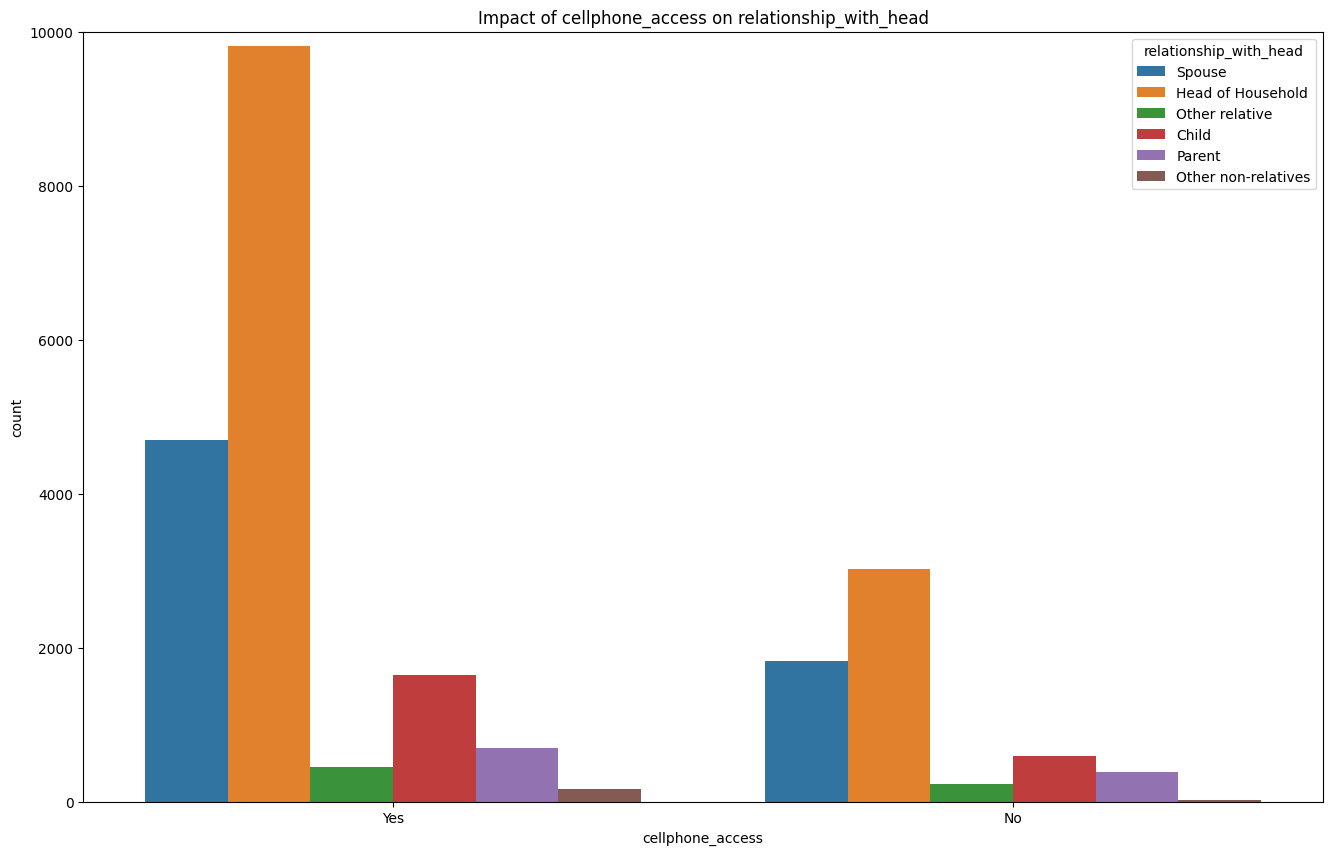

In [7]:
fig, ax=plt.subplots(figsize=(16,10))
sns.countplot(x='cellphone_access', data=train, hue='relationship_with_head')
ax.set_ylim(0,10000)
plt.title("Impact of cellphone_access on relationship_with_head")
plt.show()

Observations:
1. The head of the house is most probably going to have a bank accout
2. The are a few people that are have other relationships with the head of the house hold and they are the least in bank account possessions as well as dispossession
3. If head of the house is your spouse you have the probability to be financially included
4. The other groups have less number of respondents

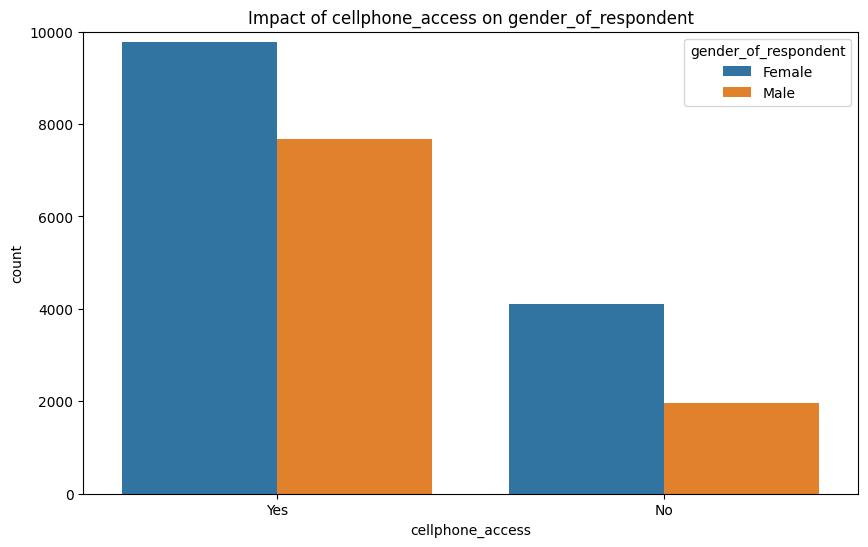

In [8]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x='cellphone_access', data=train, hue='gender_of_respondent')
ax.set_ylim(0,10000)
plt.title("Impact of cellphone_access on gender_of_respondent")
plt.show()

Observations:
1. Females that have bank accounts are many and those that do not have bank account out-number the males and that means that males from the intervieewes. 
2. Most females have bank_accounts
3. Most males are financially included
4. Males that have a bank_accoount outnumber those that do not; the males ratio is less than that of females

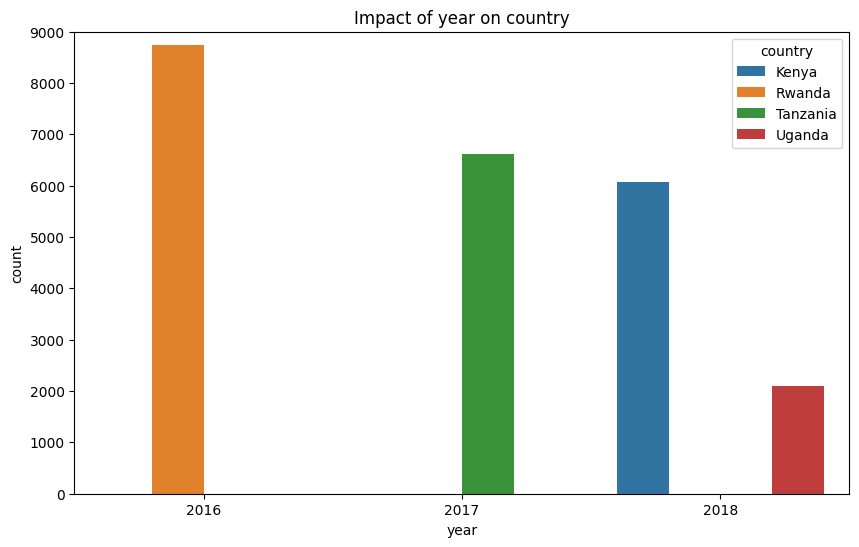

In [9]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = 'year', data = train, hue = 'country')
ax.set_ylim(0,9000)
plt.title("Impact of year on country")
plt.show()

Observations:
1. In 2016, the data was only collected from Rwanda and not the other countries (with that country having the majority of the respondents)
2. In 2017, the data was only collected from Tanzania
3. In 2018, the data was onlly collected from Uganda and Uganda
4. Maybe the people that were respondents a few years ago would have been financially included; that implies that we should create a feature from the year variable that will give the model more information about the years financial inclusion. By so doing we are going to be also assigning some importance or hierarchy to the countries.

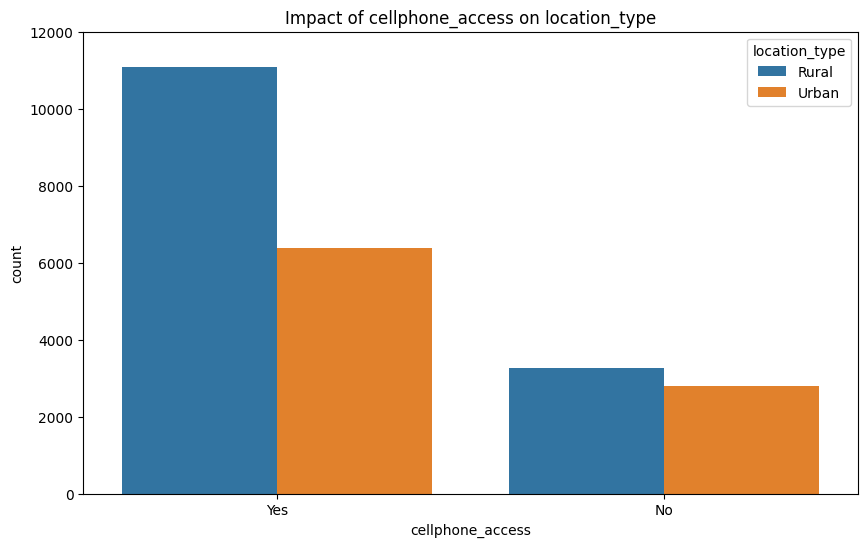

In [10]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x='cellphone_access', data=train, hue='location_type')
ax.set_ylim(0,12000)
plt.title("Impact of cellphone_access on location_type")
plt.show()

Observations:
1. Many of the people that are from the rural areas have cell phone access and from those that do not have cell phone acess the people that are from the rural areas out-number those from urban areas and this is due to the fact that the majority of the respondents are from rural areas as far as the exploratory data analysis is concerned.

In [11]:
tr = train.groupby(["household_size", "relationship_with_head"]).size().reset_index().rename(columns={0:"Counts"})
tr.head(10)

,household_size,relationship_with_head,Counts
0,1,Child,6
1,1,Head of Household,3003
2,1,Other non-relatives,2
3,1,Other relative,4
4,1,Parent,5
5,1,Spouse,37
6,2,Child,201
7,2,Head of Household,2912
8,2,Other non-relatives,39
9,2,Other relative,153


In [12]:
tr = train.groupby(["education_level", "job_type"]).size().reset_index().rename(columns={0:"Counts"})
tr

,education_level,job_type,Counts
0,No formal education,Dont Know/Refuse to answer,18
1,No formal education,Farming and Fishing,1405
2,No formal education,Formally employed Government,4
3,No formal education,Formally employed Private,33
4,No formal education,Government Dependent,131
5,No formal education,Informally employed,1130
6,No formal education,No Income,116
7,No formal education,Other Income,184
8,No formal education,Remittance Dependent,494
9,No formal education,Self employed,1000


Observations:
1. People that have lower education are mostly working as self employed or they are not formally employed, of course no all of them but the highest number of them.
2. those with higher education from secondary education to vocational/specialized training are dominating almost all the kinds of jobs that are available.

In [13]:
tr = train.groupby(["relationship_with_head", "marital_status"]).size().reset_index().rename(columns={0:"Counts"})
tr

,relationship_with_head,marital_status,Counts
0,Child,Divorced/Seperated,212
1,Child,Dont know,1
2,Child,Married/Living together,100
3,Child,Single/Never Married,1848
4,Child,Widowed,68
5,Head of Household,Divorced/Seperated,1170
6,Head of Household,Dont know,6
7,Head of Household,Married/Living together,5783
8,Head of Household,Single/Never Married,3314
9,Head of Household,Widowed,2558


#### Chedking missing values and duplicates

In [33]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)


train data shape : (23524, 13)


In [34]:
# Check for missing values
train.isnull().sum().any()

False

In [35]:
train.duplicated().any()

False

We don't have missing and duplicated data in our dataset.



#### Explore Target distribution 

Most of the interviwee do not have bank accounts

<Axes: ylabel='bank_account'>

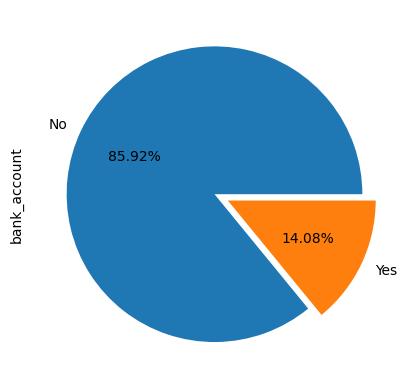

In [21]:
train['bank_account'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', explode = (0, 0.1))

In [24]:
class_weight = dict({0:1, 1:6})

Observations:
1. The dataset absolutely does not have a balance within the predictor classes and they should be handled - smote and cross validation techniques are common ways that can be used to attain the balance
2. the ratio is 1:6

### 2. Understand the dataset
We can get more information about the features presented by using the info() method from pandas.


In [12]:
#show some information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


#### Observarion Analysis

In [36]:
for i in train.columns:
    print(i, "has",train[i].nunique(), "unique observations")

country has 4 unique observations
year has 3 unique observations
uniqueid has 8735 unique observations
bank_account has 2 unique observations
location_type has 2 unique observations
cellphone_access has 2 unique observations
household_size has 20 unique observations
age_of_respondent has 85 unique observations
gender_of_respondent has 2 unique observations
relationship_with_head has 6 unique observations
marital_status has 5 unique observations
education_level has 6 unique observations
job_type has 10 unique observations


In [37]:
for i in train.columns:
    print(i, "uniques are \n",train[i].unique())

country uniques are 
 ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
year uniques are 
 [2018 2016 2017]
uniqueid uniques are 
 ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
bank_account uniques are 
 ['Yes' 'No']
location_type uniques are 
 ['Rural' 'Urban']
cellphone_access uniques are 
 ['Yes' 'No']
household_size uniques are 
 [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
age_of_respondent uniques are 
 [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
gender_of_respondent uniques are 
 ['Female' 'Male']
relationship_with_head uniques are 
 ['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
marital_s

In [38]:
# the qualitative variables are as thus as far as statistics is concerned
nominals = ["country",
           "location_type",
           "cellphone_access",
           "gender_of_respondent",
           "marital_status"]

ordinals = ["education_level", "relationship_with_head", "job_type"]

#### Visualizing Categorical Features

<Axes: ylabel='cellphone_access'>

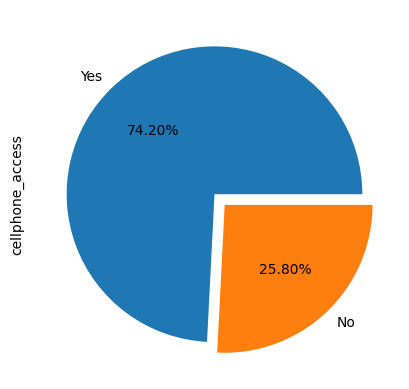

In [27]:
train['cellphone_access'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', 
                                              explode = (0, 0.1))

<Axes: ylabel='country'>

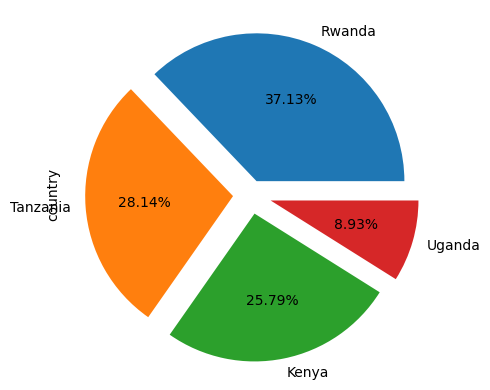

In [29]:
train['country'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%',
                                     explode = (0.1, 0.12, 0.13, 0.14))

Observations:
1. The majority of the data was collected from Rwanda, followed by Tanzania, then Kenya and the last one is Uganda.

<Axes: ylabel='year'>

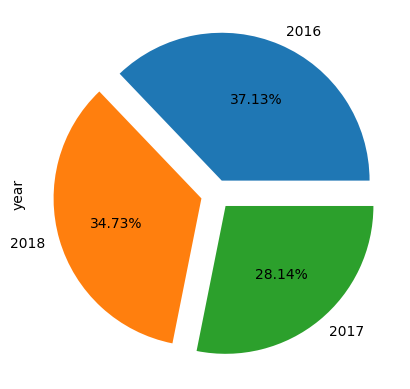

In [31]:
explode = (0.1, .102, .103)
train['year'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', explode = explode)

Observations:
1. This was more or less like a continued research as the data was collected in three different years

<Axes: ylabel='location_type'>

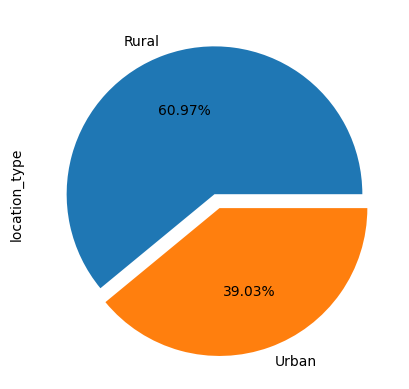

In [32]:
train['location_type'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', explode = (0, 0.10))

Observations:
1. 61% of the interviewees are from rural areas.
2. This may pose as a problem as the model might make some pattern that is not true.

<Axes: ylabel='gender_of_respondent'>

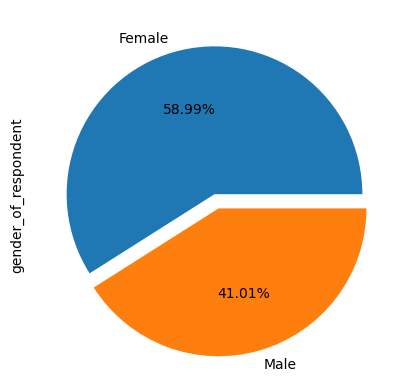

In [33]:
train['gender_of_respondent'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', 
                                                  explode = (0.0, 0.1) )

There is only a 9% difference between the Female(majority) and Male. this shouldn't be much of a problem to the model because the bias could not be there, possibly. 

<Axes: ylabel='relationship_with_head'>

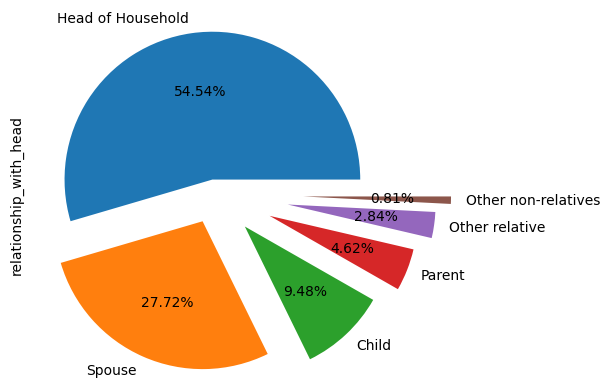

In [34]:
train['relationship_with_head'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%',
                                                    explode = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6))

Relationship with the head qualifies to be an ordinal variable and thus when encoding it we can use label encoding. There is a hierarchy between the relationship the head. This is normal because in a family the person nearest to the head is more likely to get benefits and the one who is farther away gets the least of the benefits.

<Axes: ylabel='education_level'>

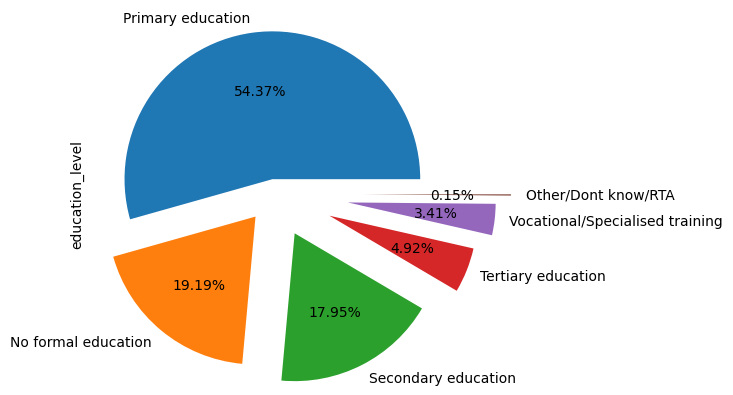

In [35]:
train['education_level'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%',
                                            explode = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6))

We have rankings in education and thus we are to let education_level be an ordinal feature.The majority of the interviewees are hold primary education, followed by no formal education.

<Axes: ylabel='job_type'>

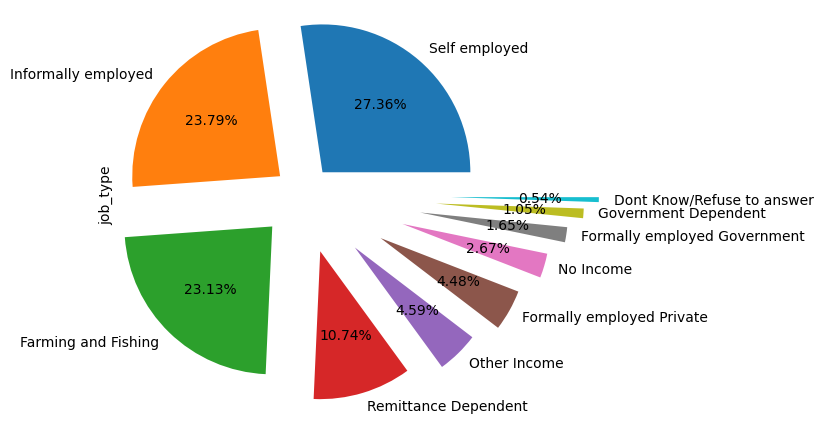

In [36]:
train['job_type'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%',
                                      explode = (0.2, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0) )

### 3. Data preparation for machine learning
Before you train the model for prediction, you need to perform data [cleaning](https://www.dataquest.io/blog/machine-learning-preparing-data/) and [preprocessing](https://towardsdatascience.com/data-preprocessing-concepts-fa946d11c825). This is a very important step; your model will not perform well without these steps.

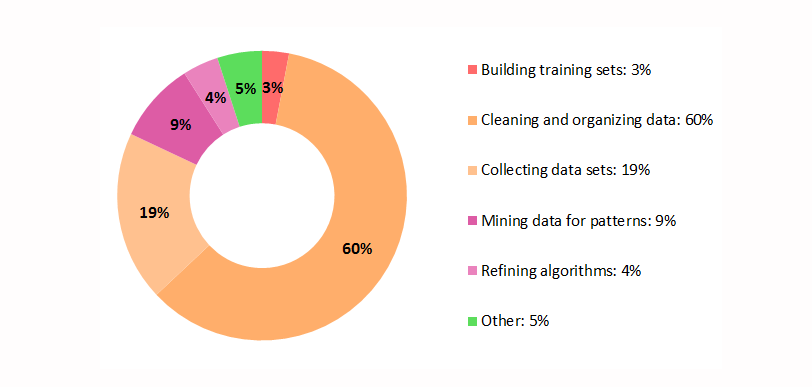


#### Outlier Visualization / Analysis

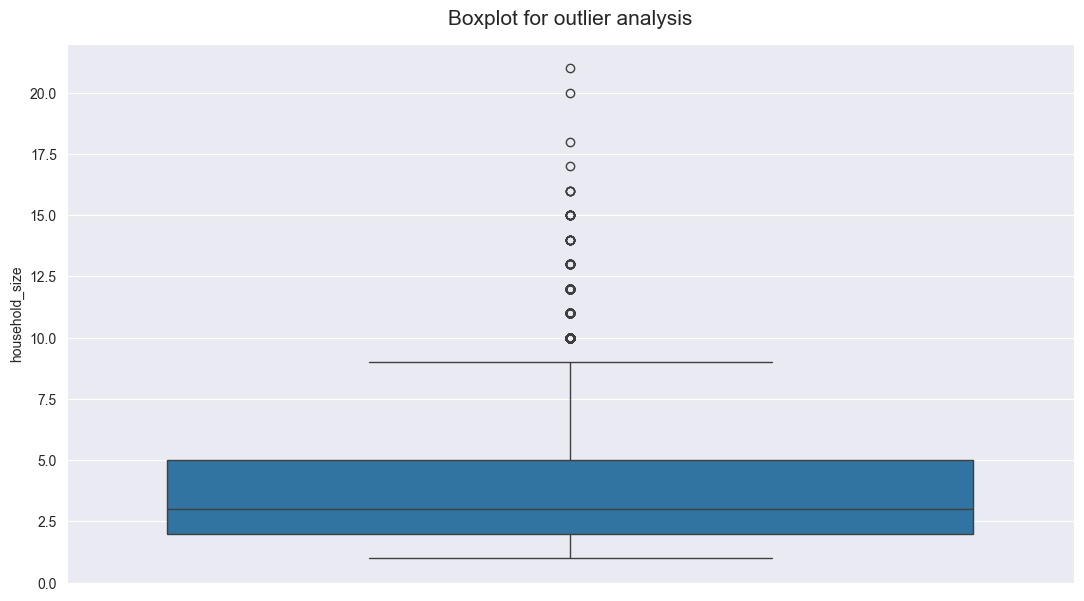

In [16]:
#plotting boxplots for outlier detection
sns.set_style("darkgrid")
plt.figure(figsize = (13,7))
sns.boxplot(train["household_size"])
plt.title("Boxplot for outlier analysis", y = 1.02, fontsize = 15)
plt.show()

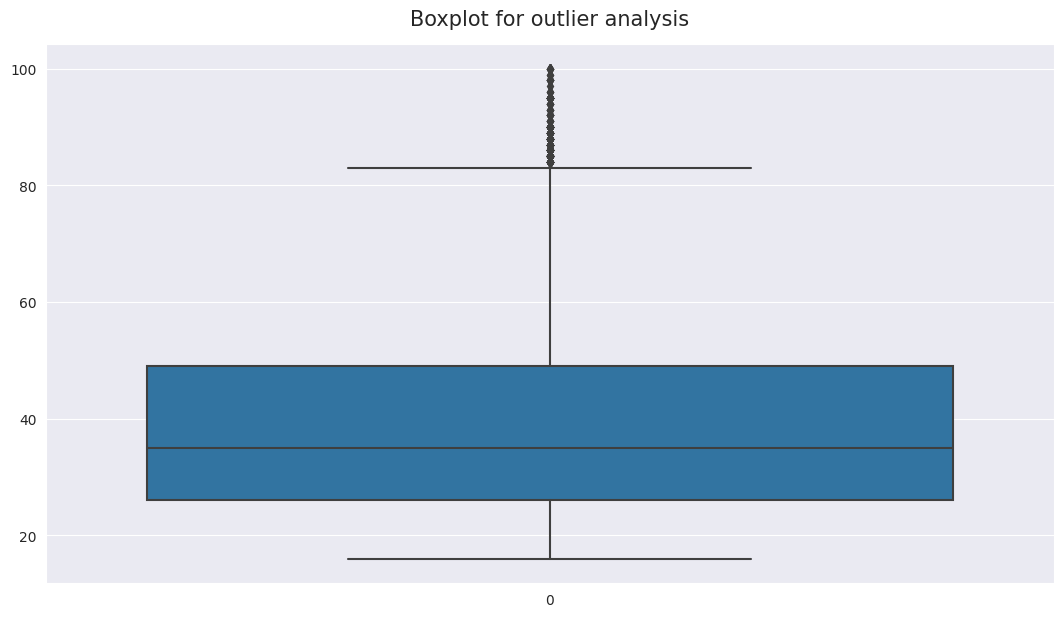

In [38]:
#plotting boxplots for outlier detection
sns.set_style("darkgrid")
plt.figure(figsize = (13,7))
sns.boxplot(train["age_of_respondent"])
plt.title("Boxplot for outlier analysis", y = 1.02, fontsize = 15)
plt.show()

#### Distribution On Numeric Features

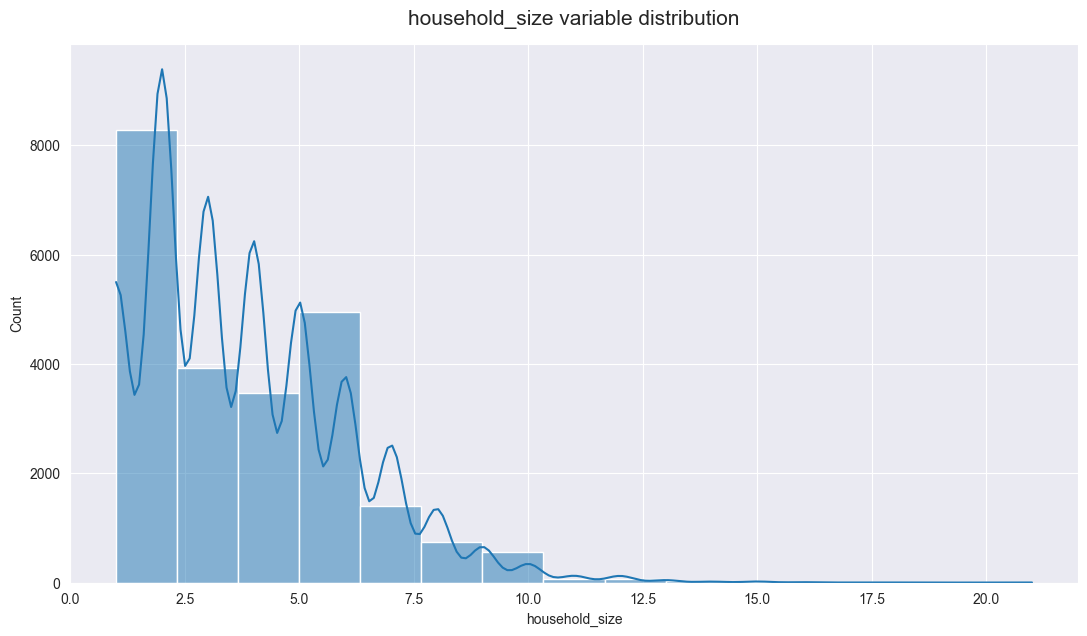

None

0.9882002433489865

In [17]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.household_size, kde = True, bins = 15)
plt.title('household_size variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.household_size.skew())

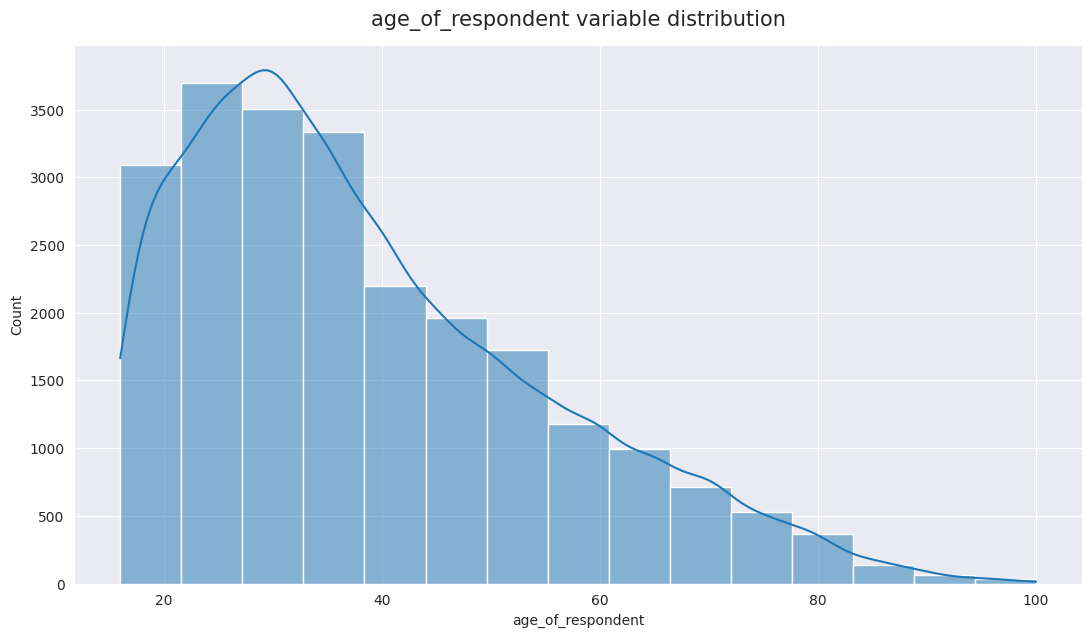

None

0.8416864881968846

In [40]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(train.age_of_respondent, kde = True, bins = 15)
plt.title('age_of_respondent variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train.age_of_respondent.skew())

Observations:
1. We can see that the two numeric features are skewed, even though the skew value is not bad - closer to 1. We then need to transform the features so that they have a normal or Gaussian distribution or a near normal distribution so that the model will be robust. They are both left skewed and thus we need to apply  transformation.

#### Outlier Handling 

In [39]:
def outlierHandler(FromSet):
    #handling outliers
    numerics = FromSet.select_dtypes(include = np.number)
    for i in numerics:
        
        #finding the Q1 and Q3 
        q1 = FromSet[i].quantile(0.25)
        q2 = FromSet[i].quantile(0.75)
        
        #finding the value of IQR
        IQR = q2- q1
        
        #finding the minimum and maximum limits
        max_limit = q2 + (1.5 * IQR)
        min_limit = q1 - (1.5 * IQR)
        
        #capping
        FromSet[i] = pd.DataFrame(np.where(FromSet[i] > max_limit, max_limit,
                                        (np.where(FromSet[i] < min_limit, min_limit, FromSet[i]))),columns = [i]) 
    return FromSet

outlierHandler(train)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018.0,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018.0,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018.0,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018.0,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018.0,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018.0,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018.0,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018.0,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018.0,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


#### Gaussian Distribution after Capping The Outliers

In [41]:
#histplot(train.household_size, kde = True, bins = 15)
def plot_data(data_frame, feature):
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    data_frame[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(data_frame[feature], dist = "norm", plot = pylab)
    plt.show()

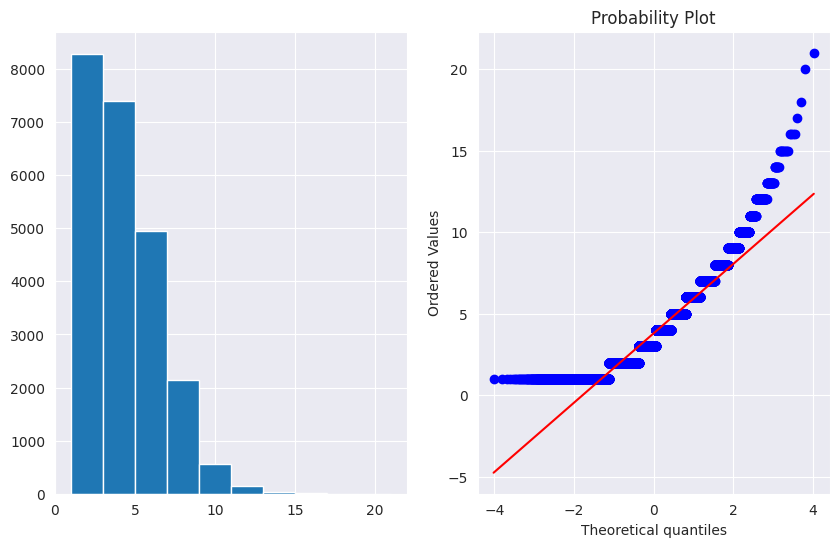

In [42]:
plot_data(train, 'household_size')

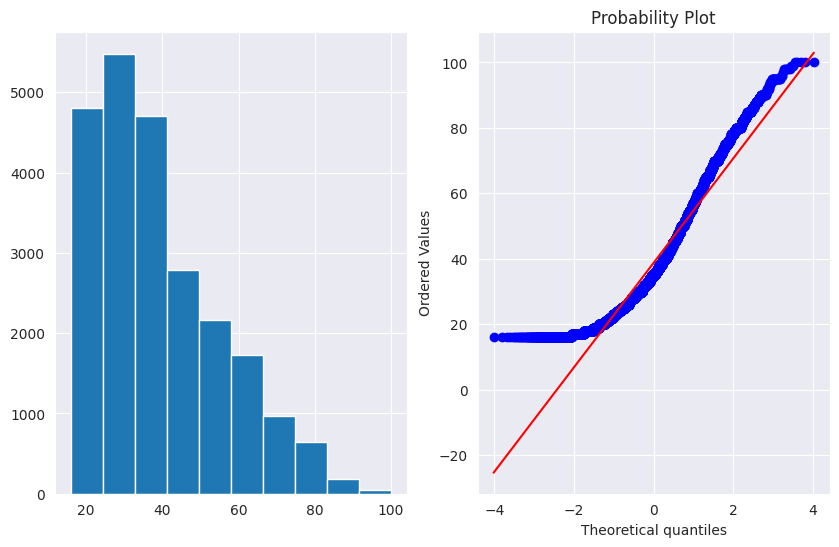

In [43]:
plot_data(train, 'age_of_respondent')

Observations:
1. Even after we have removed the noise from the data by capping the outliers there is still no gaussian distribution.
2. So in order for us to do that we need to tranform the features

# Feature Engineering

#### Discretization -> bining by instinct / custom binning

##### Apply On Train

In [40]:
# looking at the new data ranges after handling the outliers
l =[]
for i in train["household_size"].unique():
    l.append(i)
    
l.sort()
print(l)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 9.5]


In [41]:
l =[]
for i in train["age_of_respondent"].unique():
    l.append(i)
    
l.sort()
print(l)

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 83.5]


In [42]:
labels = ["small", "medium", "large"]
bins = [1, 3, 7, 21]
train["household_size"] = pd.cut(train["household_size"], bins = bins, labels = labels, include_lowest = True)

In [43]:
labels = ["young", "old", "eldery"]
bins = [16, 30, 60, 100] 
train["age_of_respondent"] = pd.cut(train["age_of_respondent"], bins = bins, labels = labels, include_lowest = True)


In [44]:
# confirm if all the observations are binned or NaN
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [49]:
train.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
10897,Rwanda,2016,uniqueid_4830,No,Rural,No,small,old,Female,Head of Household,Widowed,No formal education,Informally employed
11178,Rwanda,2016,uniqueid_5111,No,Rural,Yes,small,old,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
18389,Tanzania,2017,uniqueid_3587,No,Urban,No,medium,young,Male,Parent,Divorced/Seperated,Primary education,No Income
20640,Tanzania,2017,uniqueid_5838,No,Rural,Yes,small,young,Female,Other non-relatives,Divorced/Seperated,Primary education,Formally employed Private
490,Kenya,2018,uniqueid_491,No,Rural,Yes,small,old,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing


<Axes: ylabel='age_of_respondent'>

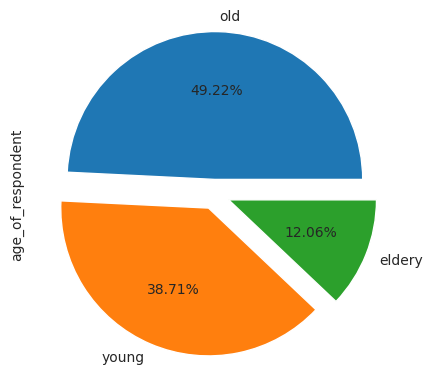

In [50]:
# visualizing the bins with a pie_chart

explode = (0.1, .102, .103)
train['age_of_respondent'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', explode = explode)

Observation:
1. The majority of the respondents fall into the old bin > (30 - 59)
2. The second largest are the young respondents and the outnumber the eldery group

<Axes: ylabel='household_size'>

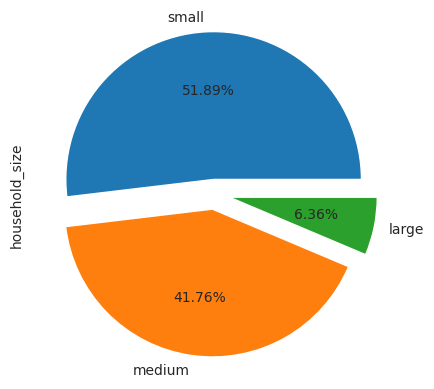

In [51]:
# visualizing the bins with a pie_chart

explode = (0.1, .102, .103)
train['household_size'].value_counts().plot(x = None, y = None, kind = "pie", autopct = '%1.2f%%', explode = explode)

Observation:
1. The largest fraction of the respondents belonged to small families
3. Medium or nuclear families then follow outnumbering the large or extended group of families
3. Definitely, this means that there is no gaussian distribution on the variables and that needs to be taken care of.

#### Encoding Qualitative Features

In [45]:
le = LabelEncoder()

# append the new features to ordinals
ordinals.extend(["household_size", "age_of_respondent"])

# encoding for ordinal data.
for i in ordinals:
    train[i] = le.fit_transform(train[i])

# encoding for nominals
train = pd.get_dummies(train, prefix_sep = "_", drop_first = True, columns = nominals)


In [46]:
train.head()

,year,uniqueid,bank_account,household_size,age_of_respondent,relationship_with_head,education_level,job_type,country_Rwanda,country_Tanzania,country_Uganda,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed
0,2018.0,uniqueid_1,Yes,2,2,5,3,9,False,False,False,False,True,False,False,True,False,False
1,2018.0,uniqueid_2,No,1,0,1,0,4,False,False,False,False,False,False,False,False,False,True
2,2018.0,uniqueid_3,Yes,1,2,3,5,9,False,False,False,True,True,True,False,False,True,False
3,2018.0,uniqueid_4,No,1,1,1,2,3,False,False,False,False,True,False,False,True,False,False
4,2018.0,uniqueid_5,No,0,2,0,2,5,False,False,False,True,False,True,False,False,True,False


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   year                                    23524 non-null  int64 
 1   uniqueid                                23524 non-null  object
 2   bank_account                            23524 non-null  object
 3   household_size                          23524 non-null  int64 
 4   age_of_respondent                       23524 non-null  int64 
 5   relationship_with_head                  23524 non-null  int64 
 6   education_level                         23524 non-null  int64 
 7   job_type                                23524 non-null  int64 
 8   country_Rwanda                          23524 non-null  uint8 
 9   country_Tanzania                        23524 non-null  uint8 
 10  country_Uganda                          23524 non-null  uint8 
 11  lo

In [47]:
encode_these = list([x for x in train.columns if train[x].dtype == 'int64'])
encode_these

[]

### Correlaton Matrix

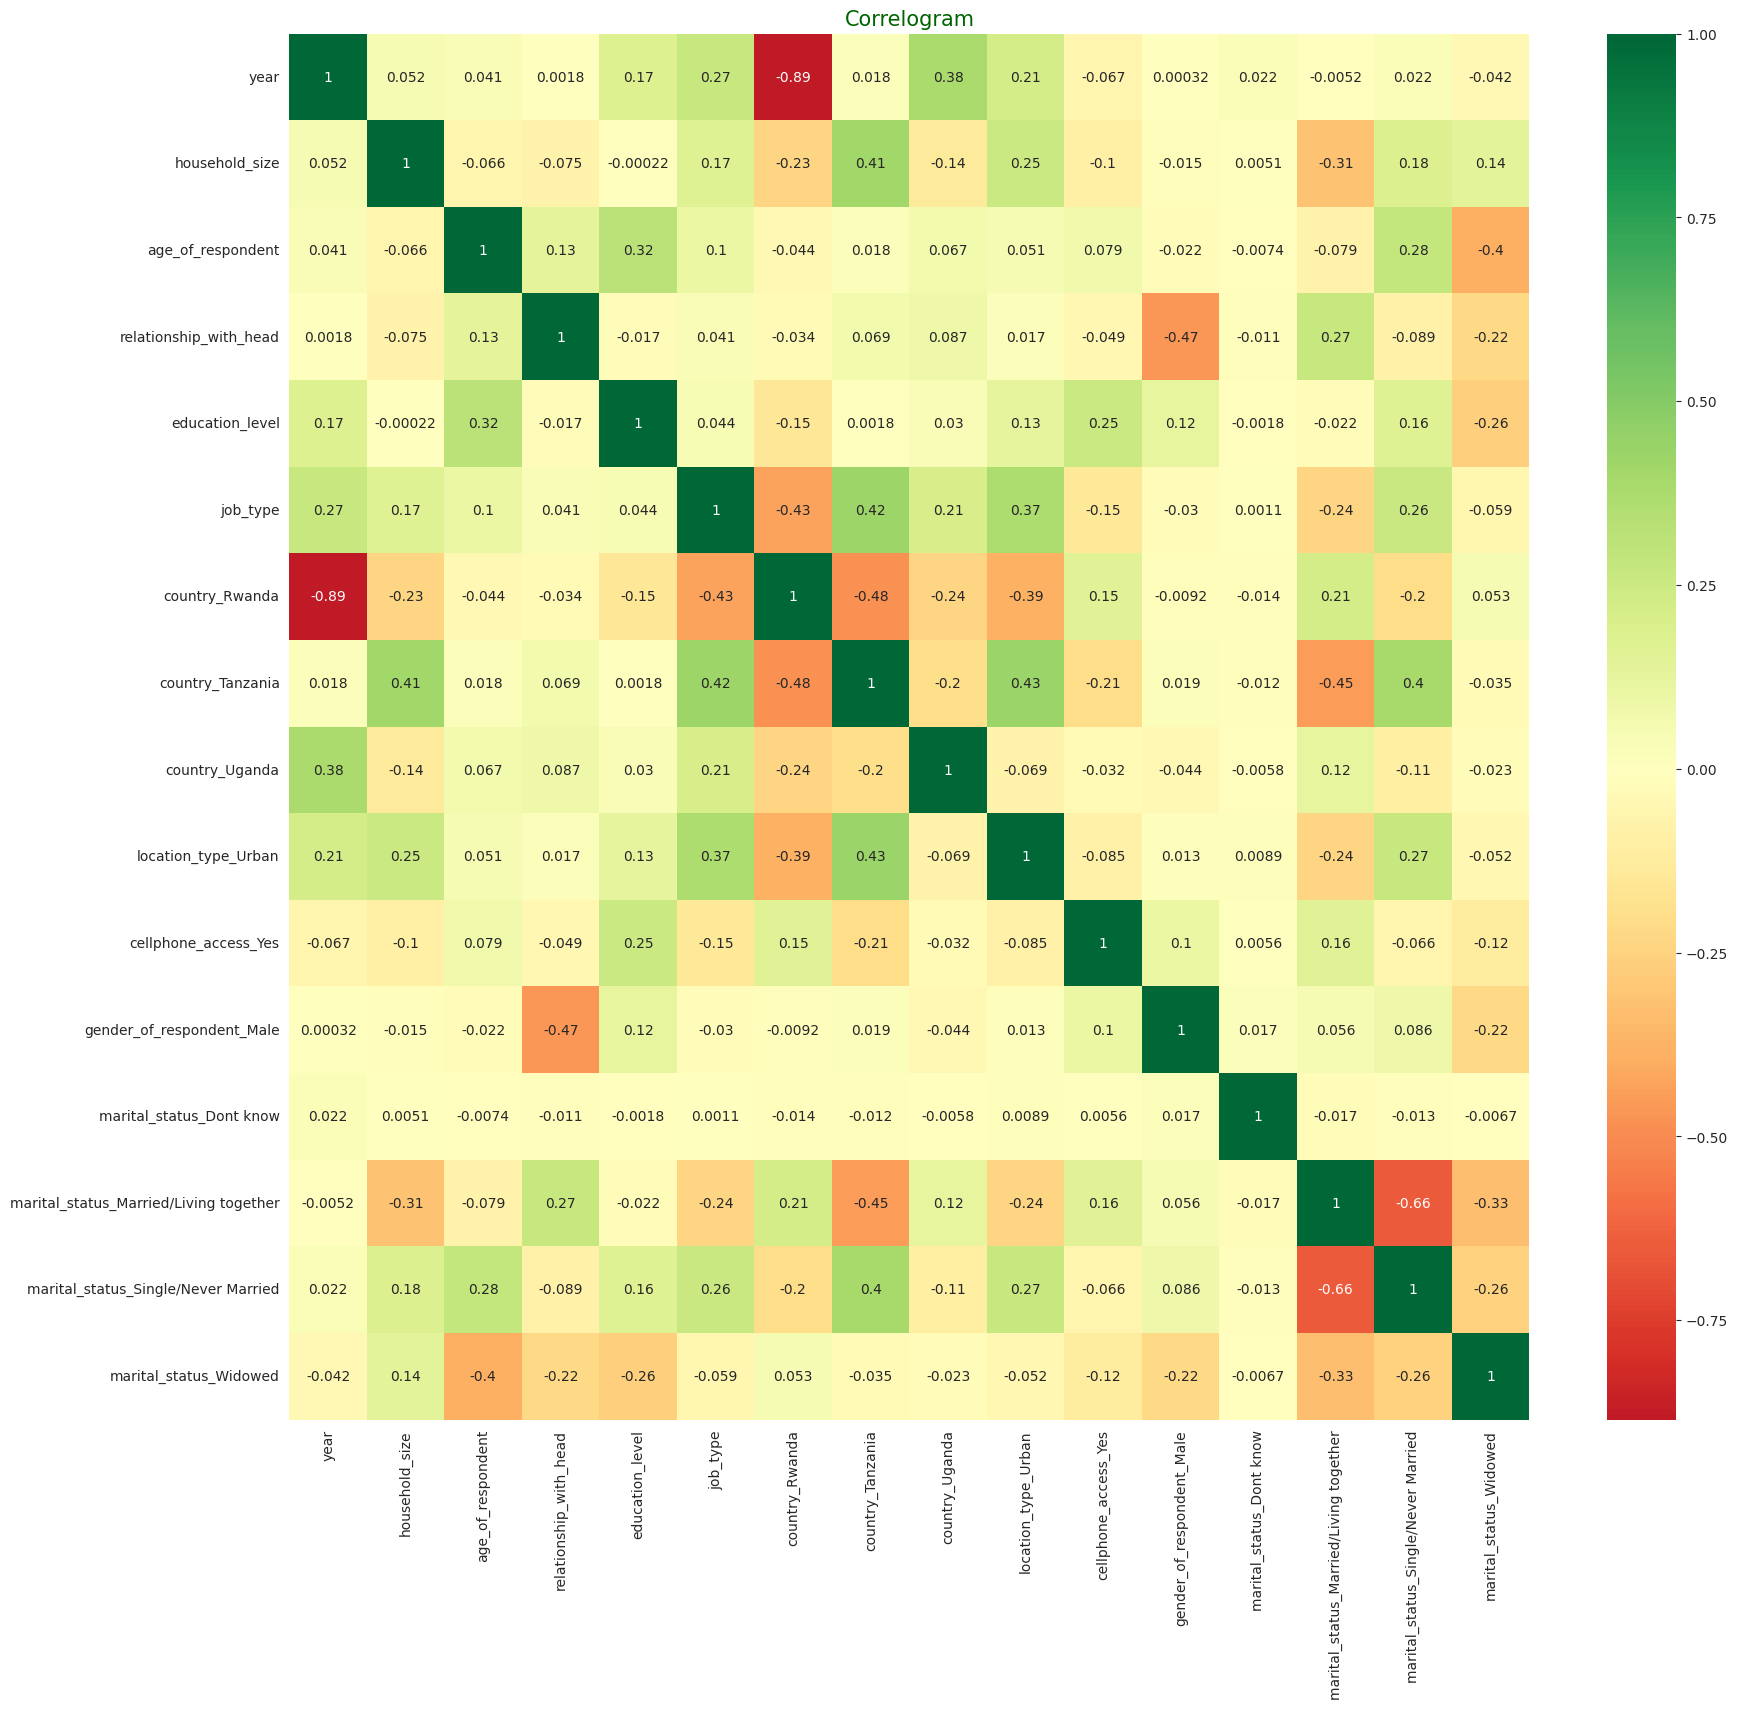

In [70]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (20, 18))
sns.heatmap(corr, cmap ='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

From the correlation matrix we can deduce that the features are not highly correlated with the majority of the correlation coefficients being around 0.

#### Encode label & splicing

In [48]:
train['bank_account'] = le.fit_transform(train['bank_account'])
X = train.drop(columns = ["bank_account", "uniqueid"], axis = 1)
y = train["bank_account"]


# FEATURE SELECTION

In [49]:
def train_RFC(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("accuracy : ", accuracy_score(y_test, y_pred))
    print("balanced accuracy : ", balanced_accuracy_score(y_test, y_pred ))
    print("mean squared error : ", mean_squared_error(y_test, y_pred))
    print("mean absolute error : ", mean_absolute_error(y_test, y_pred))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   stratify = y,
                                                   test_size = 0.25,
                                                   random_state = 42
                                                   )


In [31]:
# handle the imbalance with the best sampler - smote

smotetomek =  SMOTETomek()
smote= SMOTE()
over = RandomOverSampler()

X_train, y_train = over.fit_resample(X_train, y_train)


### Recursive Feature Elimination
1. RandomForestClassifier
2. GradientBoostingClassifier

In [43]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ----- --------------------------------- 41.0/282.6 kB 991.0 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 825.8 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 751.6 kB/s eta 0:00:01
   --------------- ---------------------- 112.6/282.6 kB 731.4 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   ---------------- --------------------- 122.9/282.6 kB 554.9 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 449.7 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 477.7 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 498.9 kB/s eta 0:00:01
   --------------------------------- ---- 245.8/282.6 kB 519.9 kB/s eta 0:00:01
   ---------------------------------- --- 256.0/282


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
from sklearn.feature_selection import RFE
from yellowbrick.model_selection import RFECV

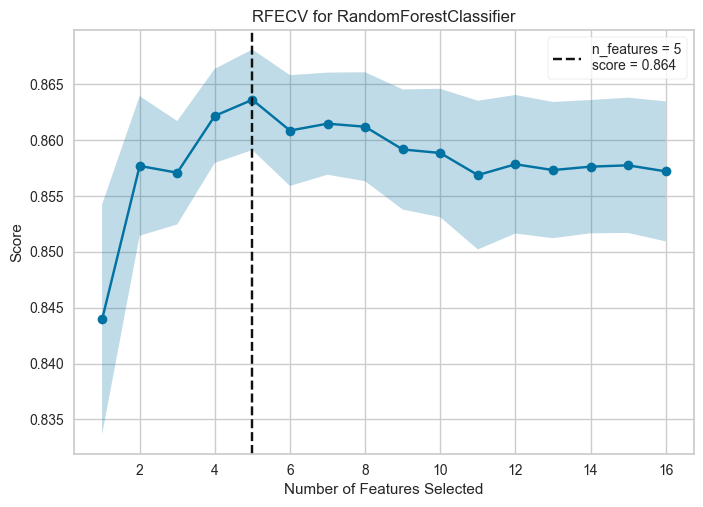

<Figure size 560x400 with 0 Axes>

<Axes: title={'center': 'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [25]:

visualizer = RFECV(
    RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1),
    step=1, cv=5, scoring="f1_weighted"
)
visualizer.fit(X_train, y_train)
plt.figure(figsize=[5.6, 4])
visualizer.show()

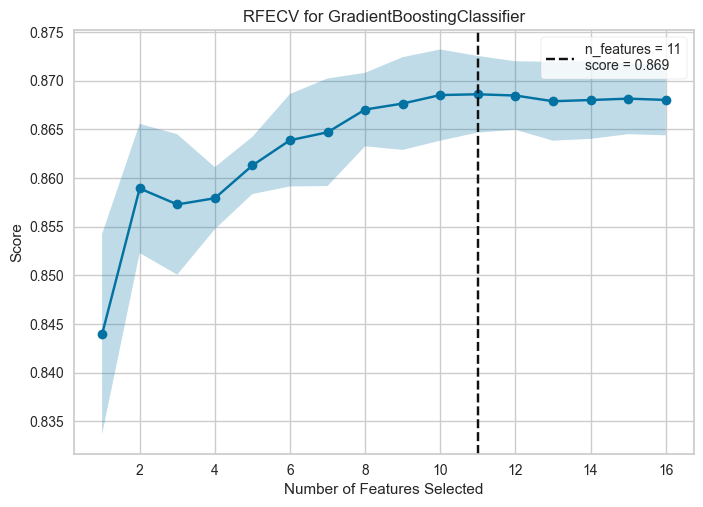

<Figure size 560x400 with 0 Axes>

<Axes: title={'center': 'RFECV for GradientBoostingClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [26]:

visualizer = RFECV(
    GradientBoostingClassifier(n_estimators = 100, random_state = 0),
    step=1, cv=5, scoring="f1_weighted"
)
visualizer.fit(X_train, y_train)
plt.figure(figsize=[5.6, 4])
visualizer.show()

In [34]:
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=10)

In [ ]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True, False, False])

In [ ]:
features = X_train.columns[sel.get_support()]
features

Index(['year', 'household_size', 'age_of_respondent', 'relationship_with_head',
       'education_level', 'job_type', 'location_type_Urban',
       'cellphone_access_Yes', 'gender_of_respondent_Male',
       'marital_status_Married/Living together'],
      dtype='object')

In [ ]:
X_train_RFC = sel.transform(X_train)
X_test_RFC = sel.transform(X_test)

In [ ]:
train_RFC(X_train_RFC, X_test_RFC, y_train, y_test)

accuracy :  0.7845604489032477
balanced accuracy :  0.7377973433297864
mean squared error :  0.21543955109675225
mean absolute error :  0.21543955109675225


##### Looping over all the available features to get the best

In [76]:
for index in range(1, (X_train.shape[-1] + 1)):
    sel = RFE(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1),
          n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train) 
    X_test_rfe = sel.transform(X_test)
    print("selected features : ", index)
    train_RFC(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

selected features :  1
accuracy :  0.864308791021935
balanced accuracy :  0.6403050371377409
mean squared error :  0.13569120897806494
mean absolute error :  0.13569120897806494

selected features :  2
accuracy :  0.8809726237034518
balanced accuracy :  0.6393990607770197
mean squared error :  0.1190273762965482
mean absolute error :  0.1190273762965482

selected features :  3
accuracy :  0.8825029756844074
balanced accuracy :  0.6266569532042475
mean squared error :  0.11749702431559259
mean absolute error :  0.11749702431559259

selected features :  4
accuracy :  0.8828430539023976
balanced accuracy :  0.6324089052182135
mean squared error :  0.11715694609760245
mean absolute error :  0.11715694609760245

selected features :  5
accuracy :  0.8847134841013433
balanced accuracy :  0.6511693440831534
mean squared error :  0.1152865158986567
mean absolute error :  0.1152865158986567

selected features :  6
accuracy :  0.8836932494473729
balanced accuracy :  0.6520903782227232
mean square

In [ ]:
for index in range(1, (X_train.shape[-1] + 1)):
    sel = RFE(GradientBoostingClassifier(n_estimators = 100, random_state = 0),
          n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_grfe = sel.transform(X_train) 
    X_test_grfe = sel.transform(X_test)
    print("selected features : ", index)
    train_RFC(X_train_grfe, X_test_grfe, y_train, y_test)
    print()

selected features :  1
accuracy :  0.765346029586805
balanced accuracy :  0.7144979401914584
mean squared error :  0.23465397041319502
mean absolute error :  0.23465397041319502

selected features :  2
accuracy :  0.7952729127699371
balanced accuracy :  0.7268642008239234
mean squared error :  0.20472708723006292
mean absolute error :  0.20472708723006292

selected features :  3
accuracy :  0.8059853766366264
balanced accuracy :  0.7341079484995282
mean squared error :  0.19401462336337358
mean absolute error :  0.19401462336337358

selected features :  4
accuracy :  0.7624553647338888
balanced accuracy :  0.7532088604750993
mean squared error :  0.2375446352661112
mean absolute error :  0.2375446352661112

selected features :  5
accuracy :  0.7748682196905288
balanced accuracy :  0.7599273784837246
mean squared error :  0.22513178030947117
mean absolute error :  0.22513178030947117

selected features :  6
accuracy :  0.7740180241455534
balanced accuracy :  0.7665014135191128
mean squa

In [77]:
# now train the model with the number of features that gives the best accuracy
sel = RFE(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs = -1),
      n_features_to_select = 5 )
sel.fit(X_train, y_train)
sel.show()
X_train_rfe = sel.transform(X_train) 
X_test_rfe = sel.transform(X_test)
train_RFC(X_train_rfe, X_test_rfe, y_train, y_test)

accuracy :  0.8830130930113926
balanced accuracy :  0.6481601784370694
mean squared error :  0.11698690698860738
mean absolute error :  0.11698690698860738


In [78]:
# get the feature names
features = X_train.columns[sel.get_support()]
features

Index(['year', 'relationship_with_head', 'education_level', 'job_type',
       'cellphone_access_Yes'],
      dtype='object')

In [79]:
# transform the features to be used in model training
X = sel.transform(X)
test = sel.transform(test)

# MODELING

#### Data Splitting 

In [52]:
sgkf = StratifiedGroupKFold(n_splits = 2,
                            shuffle = True, 
                            random_state = 42)

skf = StratifiedKFold(n_splits = 2, 
                      shuffle = True,
                      random_state = 42)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   stratify = y,
                                                   test_size = 0.25,
                                                   random_state = 42)

#### Feature Scaling

In [54]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

minmaxscaler = MinMaxScaler(feature_range = (0,1))
X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.transform(X_test)

#### Handling the data imbalance
1. Undersampler > we lose data
2. Oversampler
3. SMOTE > under and oversampling 
4. SMOTETomek

In [ ]:
# getting the best technique to handle imbalanced data using RandomForestClassifier

undersampler = RandomUnderSampler()
oversampler = RandomOverSampler()
smote = SMOTE()
smotetomek = SMOTETomek()
samplers = [undersampler, oversampler, smote, smotetomek]

rand = RandomForestClassifier()
def train_model_on_sampling_techniques(model, samplers, x_train, y_train):
    for sampler in samplers:
        x_train_samp, y_train_samp = sampler.fit_resample(x_train, y_train)
        pipeline = make_pipeline(StandardScaler(), model)
        scores = cross_val_score(pipeline, x_train_samp, y_train_samp, scoring = 'accuracy')
        print("The accuracy score for LR using {0} is {1} (+/- {2})".format(str(sampler), 
                                                                          round(scores.mean(), 3), round(scores.std(), 2)))

train_model_on_sampling_techniques(rand, samplers, X_train, y_train)

The accuracy score for LR using RandomUnderSampler() is 0.735 (+/- 0.01)
The accuracy score for LR using RandomOverSampler() is 0.735 (+/- 0.0)
The accuracy score for LR using SMOTE() is 0.738 (+/- 0.0)
The accuracy score for LR using SMOTETomek() is 0.74 (+/- 0.0)


In [111]:
# handle the imbalance with the best sampler - smotetomek

smotetomek =  SMOTETomek()
smote= SMOTE()
X_train, y_train = smotetomek.fit_resample(X_train, y_train)


# Machine Learning
1. Tune the model
2. Build the model on best parameters

### Decision Trees

In [81]:
tree = DecisionTreeClassifier(class_weight = class_weight)

In [ ]:
# Tune

strat_kfold = StratifiedKFold(shuffle=True)
model = RandomForestClassifier()
param_grid = { 
    'criterion' :['gini', 'entropy', "log_loss"],
    "splitter" : ["best", "random"],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, None]
}

grid_search = GridSearchCV(tree, param_grid, scoring = 'accuracy', cv = strat_kfold)
grid_search = grid_search.fit(X_train, y_train)
print(f'Best accuracy score is: {grid_search.best_score_} for set of parameters {grid_search.best_params_}')


Best accuracy score is: 0.6187489909163981 for set of parameters {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'random'}


In [ ]:
# Make the model using the best parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [82]:
# now build a model that uses those best parameters
tree = DecisionTreeClassifier(class_weight = class_weight,
                              criterion = "entropy",
                              max_depth = 4,
                              max_features = "sqrt",
                              splitter = "random"
                              )

In [112]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 6}, criterion='entropy',
                       max_depth=4, max_features='sqrt', splitter='random')

In [113]:
tree_pred = tree.predict(X_test)
print("accuracy : ", accuracy_score(tree_pred, y_test))
print("balanced accuracy : ", balanced_accuracy_score(tree_pred, y_test))
print("mean squared error : ", mean_squared_error(tree_pred, y_test))
print("mean absolute error : ", mean_absolute_error(tree_pred, y_test))

accuracy :  0.2822649209318143
balanced accuracy :  0.5761012311901504
mean squared error :  0.7177350790681857
mean absolute error :  0.7177350790681857


### Random Forest Classifier

In [56]:
model = RandomForestClassifier(random_state = 0)#, class_weight = class_weight)

##### Tune the RFC

In [ ]:
# tune the random forest classifier

strat_kfold = StratifiedKFold(shuffle=True)
param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7, 8, 9, 10, None],
    'criterion' :['gini', 'entropy']
}

grid_search = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = strat_kfold)
grid_search = grid_search.fit(X_train, y_train)
print(f'Best accuracy score is: {grid_search.best_score_} for set of parameters {grid_search.best_params_}')


Best accuracy score is: 0.6192769184338414 for set of parameters {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 75}


In [ ]:
# now we want to get the best parameters

grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 75}

##### Train On percentage

In [59]:
# build the model with the new features
model = RandomForestClassifier(criterion = "entropy",
                               max_depth = 10,
                            #    max_features = "auto",
                               n_estimators = 75
                               )

In [60]:
# train the model
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=75)

In [74]:
X.columns[0]

'year'

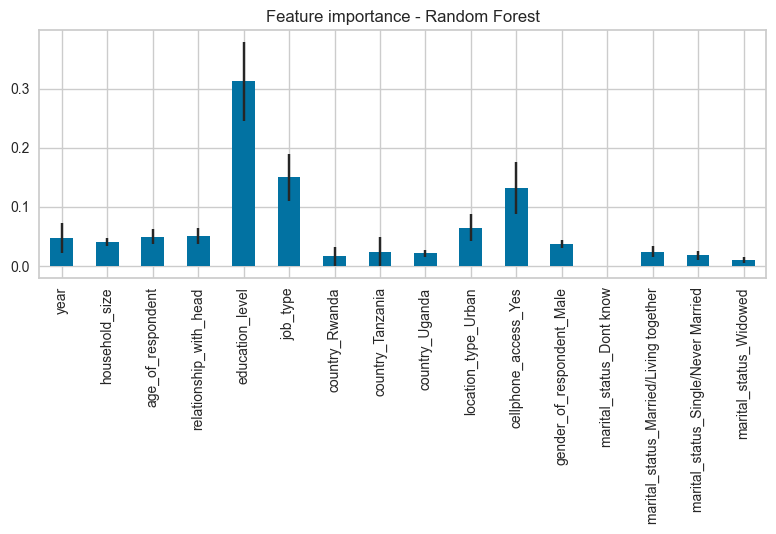

In [75]:
# feature importance
feature_names = [X.columns[f] for f in range(X_train.shape[1])]
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - Random Forest")
fig.tight_layout()

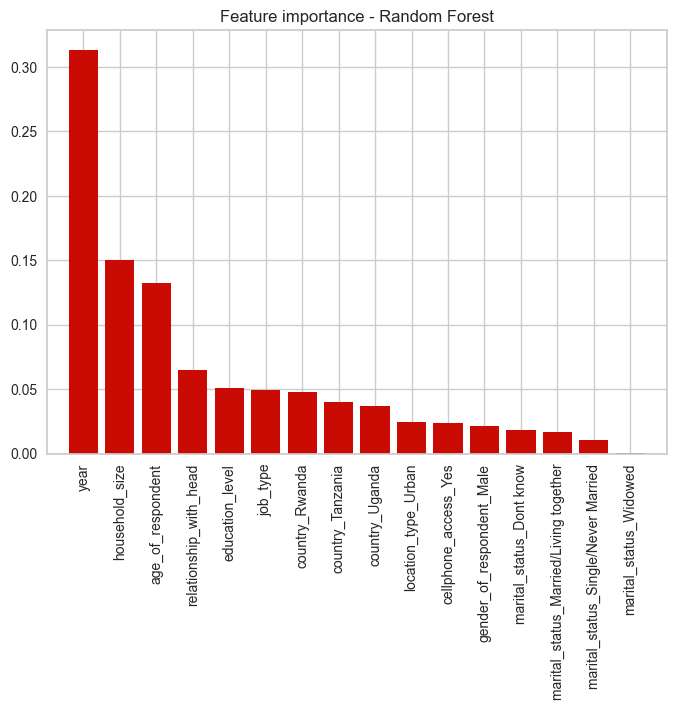

In [88]:
feature_importances = model.feature_importances_
feature_names = [X.columns[f] for f in range(X_train.shape[1])]
# Plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importance - Random Forest")
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [62]:
y_pred = model.predict(X_test)
print("accuracy : ", accuracy_score(y_pred, y_test))
print("balanced accuracy : ", balanced_accuracy_score(y_pred, y_test))
print("mean squared error : ", mean_squared_error(y_pred, y_test))
print("mean absolute error : ", mean_absolute_error(y_pred, y_test))

accuracy :  0.8877741880632546
balanced accuracy :  0.8096657745482521
mean squared error :  0.11222581193674545
mean absolute error :  0.11222581193674545


### Gradient Boosting

In [63]:
grad = GradientBoostingClassifier(criterion = 'squared_error')

In [64]:
# Tune

strat_kfold = StratifiedKFold(shuffle = True)
grad = GradientBoostingClassifier()
param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100],
    'loss' : ['log_loss', 'deviance', 'exponential'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(grad, param_grid, scoring = 'accuracy', cv = strat_kfold)
grid_search = grid_search.fit(X_train, y_train)
print(f'Best accuracy score is: {grid_search.best_score_} for set of parameters {grid_search.best_params_}')



Best accuracy score is: 0.887434467505714 for set of parameters {'learning_rate': 1.0, 'loss': 'log_loss', 'n_estimators': 25}


In [66]:
# getting the best parameter

grid_search.best_params_

{'learning_rate': 1.0, 'loss': 'log_loss', 'n_estimators': 25}

In [67]:
# now build the algorithm using the best parameters

grad = GradientBoostingClassifier(learning_rate = 1.0, 
                                  loss = "log_loss",
                                  n_estimators = 25)

In [68]:
grad.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=25)

In [82]:
# feature importance
feature_names = [X.columns[f] for f in range(X_train.shape[1])]
importances = grad.feature_importances_
std = np.std([tree.feature_importances_ for tree in grad.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importance - Gradient Boosting")
fig.tight_layout()

AttributeError: 'numpy.ndarray' object has no attribute 'feature_importances_'

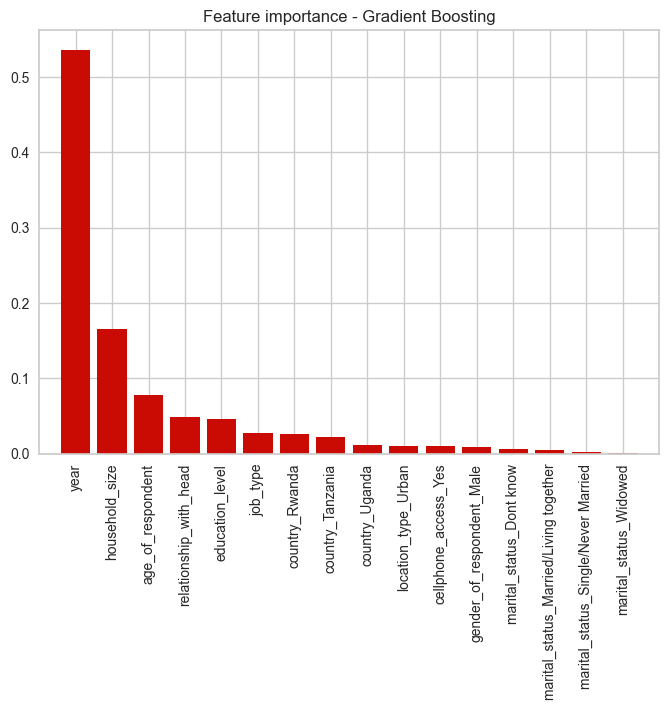

In [86]:
feature_importances = grad.feature_importances_
feature_names = [X.columns[f] for f in range(X_train.shape[1])]
# Plot feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure()
plt.title("Feature importance - Gradient Boosting")
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [117]:
grad_pred = grad.predict(X_test)
print("accuracy : ", accuracy_score(grad_pred, y_test))
print("balanced accuracy : ", balanced_accuracy_score(grad_pred, y_test))
print("mean squared error : ", mean_squared_error(grad_pred, y_test))
print("mean absolute error : ", mean_absolute_error(grad_pred, y_test))

accuracy :  0.8085359632715524
balanced accuracy :  0.6729058162218808
mean squared error :  0.19146403672844756
mean absolute error :  0.19146403672844756


# Ensemble Learning

### Using AdaBoost ----> Boosting

##### Tuning

In [93]:
adb_clf = AdaBoostClassifier(algorithm = 'SAMME.R',
                             estimator = model,
                             n_estimators = 100)

# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [94]:
# define the evaluation procedure
rskf = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3, random_state = 15)
grid_search = GridSearchCV(adb_clf, param_grid = grid, n_jobs = -1, cv = rskf,
                           scoring = 'accuracy')
grid_result = grid_search.fit(X_train, y_train)

In [95]:
# now we want to get the best parameters

grid_search.best_params_

{'learning_rate': 0.01}

##### Train On percentage

In [96]:
# build the model using the best parameters

adb_clf = AdaBoostClassifier(algorithm = 'SAMME.R',
                             estimator = model,
                             n_estimators = 100,
                              learning_rate = 0.01)

In [118]:
adb_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    max_features='auto',
                                                    n_estimators=75),
                   learning_rate=0.01, n_estimators=100)

In [119]:
preds = adb_clf.predict(X_test)

In [120]:
# metrics
print("The Accuracy is : ", accuracy_score(y_test, preds))
print("The Balanced Accuracy is : ", balanced_accuracy_score(y_test, preds))
print("The Mean Squared Error is : ", mean_squared_error(y_test, preds))

The Accuracy is :  0.8083659241625574
The Balanced Accuracy is :  0.7693224764357711
The Mean Squared Error is :  0.1916340758374426


### Using Bagging Classifier ---> Bagging

##### Tune

In [100]:
bg_clf = BaggingClassifier(random_state = 5 )
rskf = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 3, random_state = 15)
parameters = {
    'n_estimators': [10, 25, 50, 75, 100],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'oob_score': [True, False],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.90, 0.92, 0.95, 1.0],
    'max_samples': [x / 10 for x in range(1, 11)]
}
grid_search = GridSearchCV(bg_clf, parameters, cv = rskf,
                   scoring = 'accuracy')
grid_result = grid_search.fit(X_train, y_train)

In [101]:
grid_search.best_params_

{'bootstrap': False,
 'bootstrap_features': False,
 'max_features': 0.8,
 'max_samples': 0.3,
 'n_estimators': 100,
 'oob_score': False}

In [102]:
# now we want to create a model based on the best hyperparameters

bag_model = BaggingClassifier(
    n_estimators = 100,
    max_features = 0.8,
    bootstrap = False,
    bootstrap_features = False,
    oob_score = False,
    max_samples = 0.3 
)

##### Train On percentage

In [121]:
bag_model.fit(X_train, y_train)

BaggingClassifier(bootstrap=False, max_features=0.8, max_samples=0.3,
                  n_estimators=100)

In [122]:
predictions = bag_model.predict(X_test)

In [123]:
# metrics
print("The Accuracy is : ", accuracy_score(y_test, predictions))
print("The Balanced Accuracy is : ", balanced_accuracy_score(y_test, predictions))
print("The Mean Squared Error is : ", mean_squared_error(y_test, predictions))

The Accuracy is :  0.8081958850535623
The Balanced Accuracy is :  0.7707382661660791
The Mean Squared Error is :  0.19180411494643768


## Deep Learning

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras import layers
import keras_tuner

##### Network Input Preparation

In [ ]:
# one hot representation
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalization
minmaxscaler = MinMaxScaler(feature_range = (0,1))
X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.transform(X_test)

Multi-Layer Percepron

In [ ]:
# Create the Multi-Layer Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score

network = Sequential()
network.add(Dense(50, activation ='relu', input_dim = X_train.shape[-1]))
network.add(Dropout(0.2))
network.add(Dense(25, activation ='relu'))
network.add(Dense(7, activation ='relu'))  
network.add(Dense(2, activation ='relu'))

#compile the model
network.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#build the model
network.fit(X_train, y_train, epochs = 50)


#make predictions on validation set
y_pred = network.predict(X_test)
print("The mean squared error is ", mean_squared_error(y_test, y_pred))

scores2 = network.evaluate(X_test, y_test, verbose = 2)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

**Neural Network HyperParameter Tuning -> Keras_tuner**

In [ ]:
#this is the basis of creating the function returning the model

def build_model(hp):
  net = keras.Sequential()
  for i in range(hp.Int("num_layers", 1, 10)):
    net.add(
        layers.Dense(
            units= hp.Int(
                f"units_{i}",
                min_value = 32,
                max_value = 512,
                step = 32
            ),
            activation = hp.Choice("activation", ["relu", "tanh", "sigmoid"])
        )
    )
    if hp.Boolean("dropout"):                                                       #tuning the dropout layer
      net.add(layers.Dropout(rate = 0.2))

  net.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  
  net.add(keras.layers.Dense(2, activation = hp.Choice("activation", ['relu', 'sigmoid', 'softmax'])))
  
  model.compile(optimizer = 'adam', 
              loss = 'mean_absolute_error', 
              metrics = [keras.metrics.MeanAbsoluteError()])
  return net

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective = keras_tuner.objective('val_mean_absolute_error', direction = "min"),
    max_trials = 2,
    executions_per_trial = 5,
    overwrite = True,
    directory = "my_dir",
    project_name = "first"
    )

In [ ]:
tuner.results_summary()

In [ ]:
#getting the best network and training it

net = Sequential()
net.add(Dense(units = , activation = ))
net.add(Dense(units = , activation = ))
net.add(Dense(units = , activation = ))

In [ ]:
# compile the model
net.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ["accuracy"])

In [ ]:
# train model
net.fit(X_train, y_train, epochs = 50)

In [ ]:
# Evaluate the model
net_pred = network.predict(X_test)
print("mean squared error : ", mean_squared_error(y_test, net_pred))
print("balanced accuracy score : ", balanced_accuracy_score(y_test, net_pred))
print("accuracy : ", accuracy_score(y_test, net_pred))

In [ ]:
# tune the number of epochs > where the loss cross entropy underfitting is on the cards
plt.plot(net.history["loss"])
plt.plot(network.history["val_loss"])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "test"])
plt.show()